In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import geopandas as gpd

In [3]:
df = pd.read_csv('../data/clean/clean_rents.csv',dtype = {'zipcode':str})
df.head()

,median_rent,zipcode,time,source,median_rent_moe
0,1195.0,23462,2010.166667,zillow_zipcode,NaN
1,3200.0,85255,2010.166667,zillow_zipcode,NaN
2,1900.0,33178,2010.166667,zillow_zipcode,NaN
3,2000.0,33180,2010.166667,zillow_zipcode,NaN
4,795.0,32547,2010.166667,zillow_zipcode,NaN


In [4]:
df = df.sort_values('time')

In [5]:
df.source.unique()

array(['zillow_zipcode', 'acs_5year_zipcode_recent_mover',
       'acs_1year_county_recent_mover', 'SAFMR'], dtype=object)

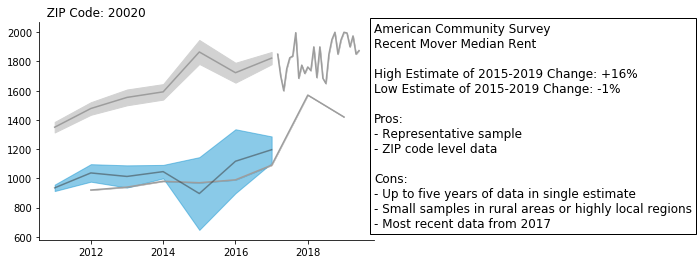

In [111]:
sources = list(df.source.unique())
zipcode = '20020'
focus_source = 'acs_5year_zipcode_recent_mover'
sources.sort(key = focus_source.__eq__) 
fig, ax = plt.subplots(1)

dfs = {source : df[(df.zipcode == zipcode) & (df.source == source)] for source in sources}
for source in dfs:
    df_source = dfs[source]
    df_source = df_source.fillna(0)
    color = '#1696d2' if source == focus_source else "#d2d2d2"
    line_color = '#353535' if source == focus_source else "#9d9d9d"
    alpha = .5 if source == focus_source else 1
    plt.plot(
        df_source.time, 
        df_source.median_rent,
        color = line_color,
        alpha = alpha
    )
    plt.fill_between(
        x = df_source.time, 
        y1 = df_source.median_rent+df_source.median_rent_moe,
        y2 = df_source.median_rent-df_source.median_rent_moe,
        color = color,
        alpha = alpha
    )
plt.title(f"  ZIP Code: {zipcode}", loc = 'Left')
#plt.legend(bbox_to_anchor=(1, 1))
textstr ='\n'.join([
    'American Community Survey',
    'Recent Mover Median Rent',
    '',
    'High Estimate of 2015-2019 Change: +16%',
    'Low Estimate of 2015-2019 Change: -1%',
    '',
    'Pros:',
    '- Representative sample',
    '- ZIP code level data',
    '',
    'Cons:',
    '- Up to five years of data in single estimate',
    '- Small samples in rural areas or highly local regions',
    '- Most recent data from 2017'
])
props = dict(ec='black',fc ='white')

plt.text(1,1, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top',bbox = props)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Map

In [51]:
rent_change = pd.read_csv('../data/clean/rent_change.csv')

In [52]:
rent_change.sort_values('zipcode')

,zipcode,low,high,uncertainty
22,20001,-0.282927,0.078482,0.361409
13,20002,-0.187500,0.208791,0.396291
19,20003,-0.344000,0.202128,0.546128
254,20004,-0.104000,-0.001027,0.102973
36,20005,-0.361702,0.107399,0.469102
180,20006,-0.134078,-0.001027,0.133051
37,20007,-0.186603,0.154895,0.341498
54,20008,-0.308000,0.115471,0.423471
6,20009,-0.353191,0.018519,0.371710
31,20010,-0.257310,0.129353,0.386663


In [53]:
print(len(rent_change))
rent_change.head()

525


,zipcode,low,high,uncertainty
0,20147,-0.116402,0.138486,0.254888
1,20874,-0.126374,0.044118,0.170491
2,20852,-0.191781,0.052632,0.244412
3,20190,-0.205128,0.084350,0.289478
4,20171,-0.110000,0.071429,0.181429


In [54]:
map_df = gpd.read_file('../data/zipcodes/dc/Zip_Codes.shp', dtype={'ZIPCODE':str})
map_df = map_df.merge(rent_change, left_on = 'ZIPCODE', right_on = 'zipcode')


In [108]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'high'
cmap = 'RdBu'
# set the range for the choropleth
vmin, vmax = -1, 1
map_df[variable+'_scaled'] = map_df[variable].apply(
    lambda x: vmin if x < vmin else vmax if x > vmax else x
)
variable = variable+'_scaled'

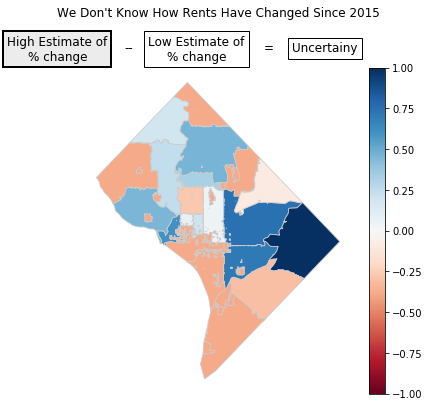

In [110]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.axis('off')
map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.title("We Don't Know How Rents Have Changed Since 2015\n\n\n")
props = dict(ec='black',fc ='white')
props_select = dict(ec='black',fc ='#ececec', lw = 2)

plt.text(-0.1,1.1, 'High Estimate of\n% change', transform=ax.transAxes, fontsize=12,
        verticalalignment='top',horizontalalignment = 'center',bbox = props_select)
plt.text(0.15,1.08, '--', transform=ax.transAxes, fontsize=12,
        verticalalignment='top',)
plt.text(0.42,1.1, 'Low Estimate of\n% change', transform=ax.transAxes, fontsize=12,
        verticalalignment='top',horizontalalignment = 'center',bbox = props)
plt.text(0.67,1.08, '=', transform=ax.transAxes, fontsize=12,
        verticalalignment='top',)
plt.text(0.90,1.08, 'Uncertainy', transform=ax.transAxes, fontsize=12,
        verticalalignment='top',horizontalalignment = 'center',bbox = props)
plt.show()
